In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from fairlearn.preprocessing import CorrelationRemover

In [2]:
data = fetch_openml(data_id=43874, as_frame=True)
X_raw = data.data[["race", "time_in_hospital", "had_inpatient_days", "medicare"]]
X_raw = pd.get_dummies(X_raw)
y = data.target

In [3]:
X_raw.head()

,time_in_hospital,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,had_inpatient_days_True,had_inpatient_days_False,medicare_True,medicare_False
0,1.0,0,0,1,0,0,0,0,1,0,1
1,3.0,0,0,1,0,0,0,0,1,0,1
2,2.0,1,0,0,0,0,0,1,0,0,1
3,2.0,0,0,1,0,0,0,0,1,0,1
4,1.0,0,0,1,0,0,0,0,1,0,1


In [6]:
X_raw.columns

Index(['time_in_hospital', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_Unknown',
       'had_inpatient_days_True', 'had_inpatient_days_False', 'medicare_True',
       'medicare_False'],
      dtype='object')

In [4]:
cr = CorrelationRemover(sensitive_feature_ids=["race_AfricanAmerican"])
X_cr = cr.fit_transform(X_raw)

In [5]:
X_cr.shape

(101766, 10)

In [7]:
X_cr = pd.DataFrame(X_cr, columns=['time_in_hospital', 'race_Asian','race_Caucasian', 
                                   'race_Hispanic', 'race_Other', 'race_Unknown', 'had_inpatient_days_True', 
                                   'had_inpatient_days_False', 'medicare_True', 'medicare_False'])
X_cr["race_AfricanAmerican"] = X_raw["race_AfricanAmerican"]

In [8]:
X_cr.head()

,time_in_hospital,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,had_inpatient_days_True,had_inpatient_days_False,medicare_True,medicare_False,race_AfricanAmerican
0,1.026032,-0.001466,0.825998,-0.004658,-0.003444,-0.005197,0.004655,0.995345,-0.017762,1.017762,0
1,3.026032,-0.001466,0.825998,-0.004658,-0.003444,-0.005197,0.004655,0.995345,-0.017762,1.017762,0
2,1.888126,0.006299,0.747784,0.020017,0.014799,0.022336,0.979996,0.020004,0.076335,0.923665,1
3,2.026032,-0.001466,0.825998,-0.004658,-0.003444,-0.005197,0.004655,0.995345,-0.017762,1.017762,0
4,1.026032,-0.001466,0.825998,-0.004658,-0.003444,-0.005197,0.004655,0.995345,-0.017762,1.017762,0


In [9]:
cr_alpha = CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'], alpha=0.5)
X_cr_alpha = cr_alpha.fit_transform(X_raw)
X_cr_alpha = pd.DataFrame(X_cr_alpha, columns=['time_in_hospital', 'race_Asian','race_Caucasian', 'race_Hispanic', 
                                               'race_Other', 'race_Unknown', 'had_inpatient_days_True', 
                                               'had_inpatient_days_False', 'medicare_True', 'medicare_False'])
X_cr_alpha["race_AfricanAmerican"] = X_raw["race_AfricanAmerican"]

In [10]:
X_cr_alpha.head()

,time_in_hospital,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,had_inpatient_days_True,had_inpatient_days_False,medicare_True,medicare_False,race_AfricanAmerican
0,1.013016,-0.000733,0.912999,-0.002329,-0.001722,-0.002599,0.002327,0.997673,-0.008881,1.008881,0
1,3.013016,-0.000733,0.912999,-0.002329,-0.001722,-0.002599,0.002327,0.997673,-0.008881,1.008881,0
2,1.944063,0.003149,0.373892,0.010008,0.007399,0.011168,0.989998,0.010002,0.038167,0.961833,1
3,2.013016,-0.000733,0.912999,-0.002329,-0.001722,-0.002599,0.002327,0.997673,-0.008881,1.008881,0
4,1.013016,-0.000733,0.912999,-0.002329,-0.001722,-0.002599,0.002327,0.997673,-0.008881,1.008881,0


In [11]:
def plot_heatmap(df, title):
    df['target'] = y
    df = df.rename(columns={"had_inpatient_days_True": "had_inpatient_days"})
    cols = list(df.columns)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(round(df.corr(), 2), cmap="coolwarm")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(cols)), labels=cols)
    ax.set_yticks(np.arange(len(cols)), labels=cols)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=15, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cols)):
        for j in range(len(cols)):
            ax.text(
                j,
                i,
                round(df.corr().to_numpy()[i, j], 2),
                ha="center",
                va="center",
            )

    ax.set_title(f"{title}")
    plt.show()

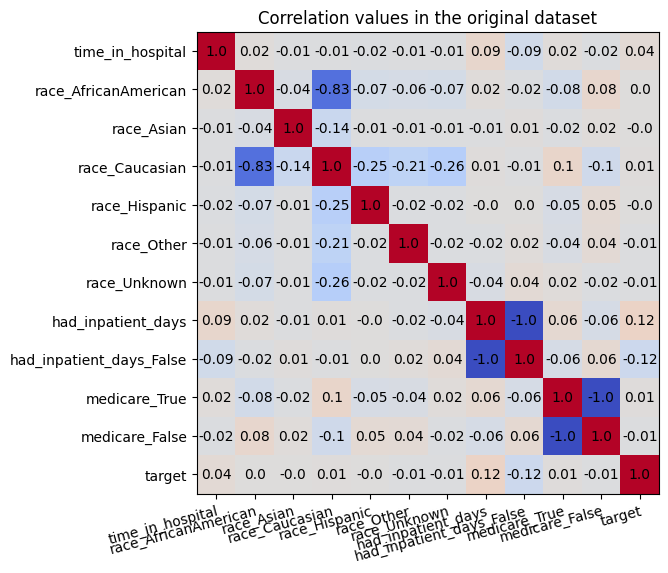

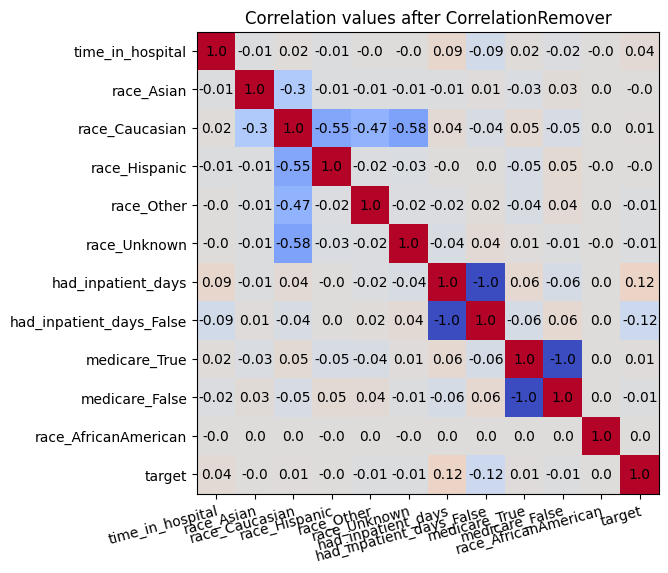

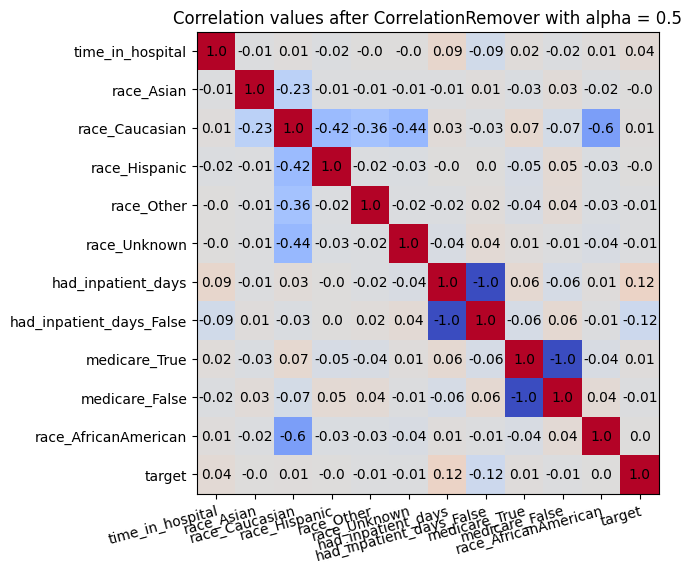

In [12]:
plot_heatmap(X_raw, "Correlation values in the original dataset")
plot_heatmap(X_cr, "Correlation values after CorrelationRemover")
plot_heatmap(X_cr_alpha, "Correlation values after CorrelationRemover with alpha = 0.5")